In [ ]:
I

In [2]:
# Magic commands
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv

In [21]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx 

In [9]:
def combine_markdown_files(input_folder, output_file):
    """
    Combine all markdown files in the input_folder into one output_file.
    
    Parameters:
    input_folder (str): The folder containing markdown files.
    output_file (str): The path where the combined markdown file will be saved.
    """
    with open(output_file, 'w', encoding='utf-8') as outfile:
        for filename in os.listdir(input_folder):
            if filename.endswith('.md'):
                file_path = os.path.join(input_folder, filename)
                with open(file_path, 'r', encoding='utf-8') as infile:
                    outfile.write(infile.read())
                    outfile.write("\n\n")  # Optional: Add spacing between files

    print(f"Combined markdown file saved at: {output_file}")

combine_markdown_files("../data/raw", "../data/processed/raw_combined.md")

Combined markdown file saved at: ../data/processed/raw_combined.md


In [12]:
# Define the path of the original JSON file and the new JSON file
input_file_path = '../data/faq_test_data/faq_test_data.json'
output_file_path = '../data/faq_test_data/faq_test_data2.json'
url_to_add = 'https://www.familysearch.org/en/help/helpcenter/source-linker-learning-center'  # Define the URL you want to add

# Read the original JSON file
with open(input_file_path, 'r') as file:
    data = json.load(file)

# Add the 'url' field to each entry
for entry in data:
    entry['url'] = url_to_add

# Save the new content to another JSON file
with open(output_file_path, 'w') as file:
    json.dump(data, file, indent=4)

print(f"File saved at {output_file_path} with the 'url' field added.")

File saved at ../data/faq_test_data/faq_test_data2.json with the 'url' field added.


In [14]:
# Define the paths of the two input JSON files and the output JSON file
input_file_path_1 = '../data/faq_test_data/additional_faqs.json'
input_file_path_2 = '../data/faq_test_data/faq_test_data2.json'
output_file_path = '../data/faq_test_data/complete_faq_data_test.json'

# Read the first JSON file
with open(input_file_path_1, 'r', encoding='utf-8') as file:
    data1 = json.load(file)

# Read the second JSON file
with open(input_file_path_2, 'r', encoding='utf-8') as file:
    data2 = json.load(file)

# Combine the two data lists
combined_data = data1 + data2

# Save the combined data into a new JSON file with Unicode characters
with open(output_file_path, 'w', encoding='utf-8') as file:
    json.dump(combined_data, file, indent=4, ensure_ascii=False)

print(f"Combined file saved at {output_file_path}.")

Combined file saved at ../data/faq_test_data/complete_faq_data_test.json.


In [17]:
# Define the path for the input JSON file and the output CSV file
input_file_path = '../data/faq_test_data/complete_faq_data_test.json'  # Path to the combined JSON file
output_file_path = '../data/processed/faq_data.csv'  # Path where the CSV will be saved

# Read the combined JSON file
with open(input_file_path, 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Open the output CSV file for writing
with open(output_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the header row
    csv_writer.writerow(['Question', 'Answer', 'URL'])

    # Write each entry in the JSON file as a row in the CSV file
    for entry in data:
        csv_writer.writerow([entry['question'], entry['answer'], entry['url']])

print(f"CSV file saved at {output_file_path}")

CSV file saved at ../data/processed/faq_data.csv


In [5]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [6]:
# Define the path to your CSV file
csv_file_path = '../data/processed/faq_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame as a table
df

,Question,Answer,URL
0,How can I attach a source to multiple ancestor...,You can use Source Linker to attach a source t...,https://www.familysearch.org/en/help/helpcente...
1,What should I do if a person is not identified...,If a person from a record isn't identified in ...,https://www.familysearch.org/en/help/helpcente...
2,What is the difference between the blue and ye...,The blue detach button removes the connection ...,https://www.familysearch.org/en/help/helpcente...
3,How can I determine if a source matches my anc...,Ask yourself how well the source matches vital...,https://www.familysearch.org/en/help/helpcente...
4,How can I edit information in Family Tree usin...,"In Source Linker, click the 'Compare' button n...",https://www.familysearch.org/en/help/helpcente...
5,What is the purpose of entering a reason state...,A reason statement explains why you made chang...,https://www.familysearch.org/en/help/helpcente...
6,How do I attach a source from my source box to...,"To attach a source from your source box, sign ...",https://www.familysearch.org/en/help/helpcente...
7,How can I add an unconnected person to Family ...,"To add an unconnected person, sign in to Famil...",https://www.familysearch.org/en/help/helpcente...
8,What should I do if a person's name is not ali...,If a person's name is not aligned in Source Li...,https://www.familysearch.org/en/help/helpcente...
9,What should I do if I find information missing...,"If something is missing in Family Tree, first ...",https://www.familysearch.org/en/help/helpcente...


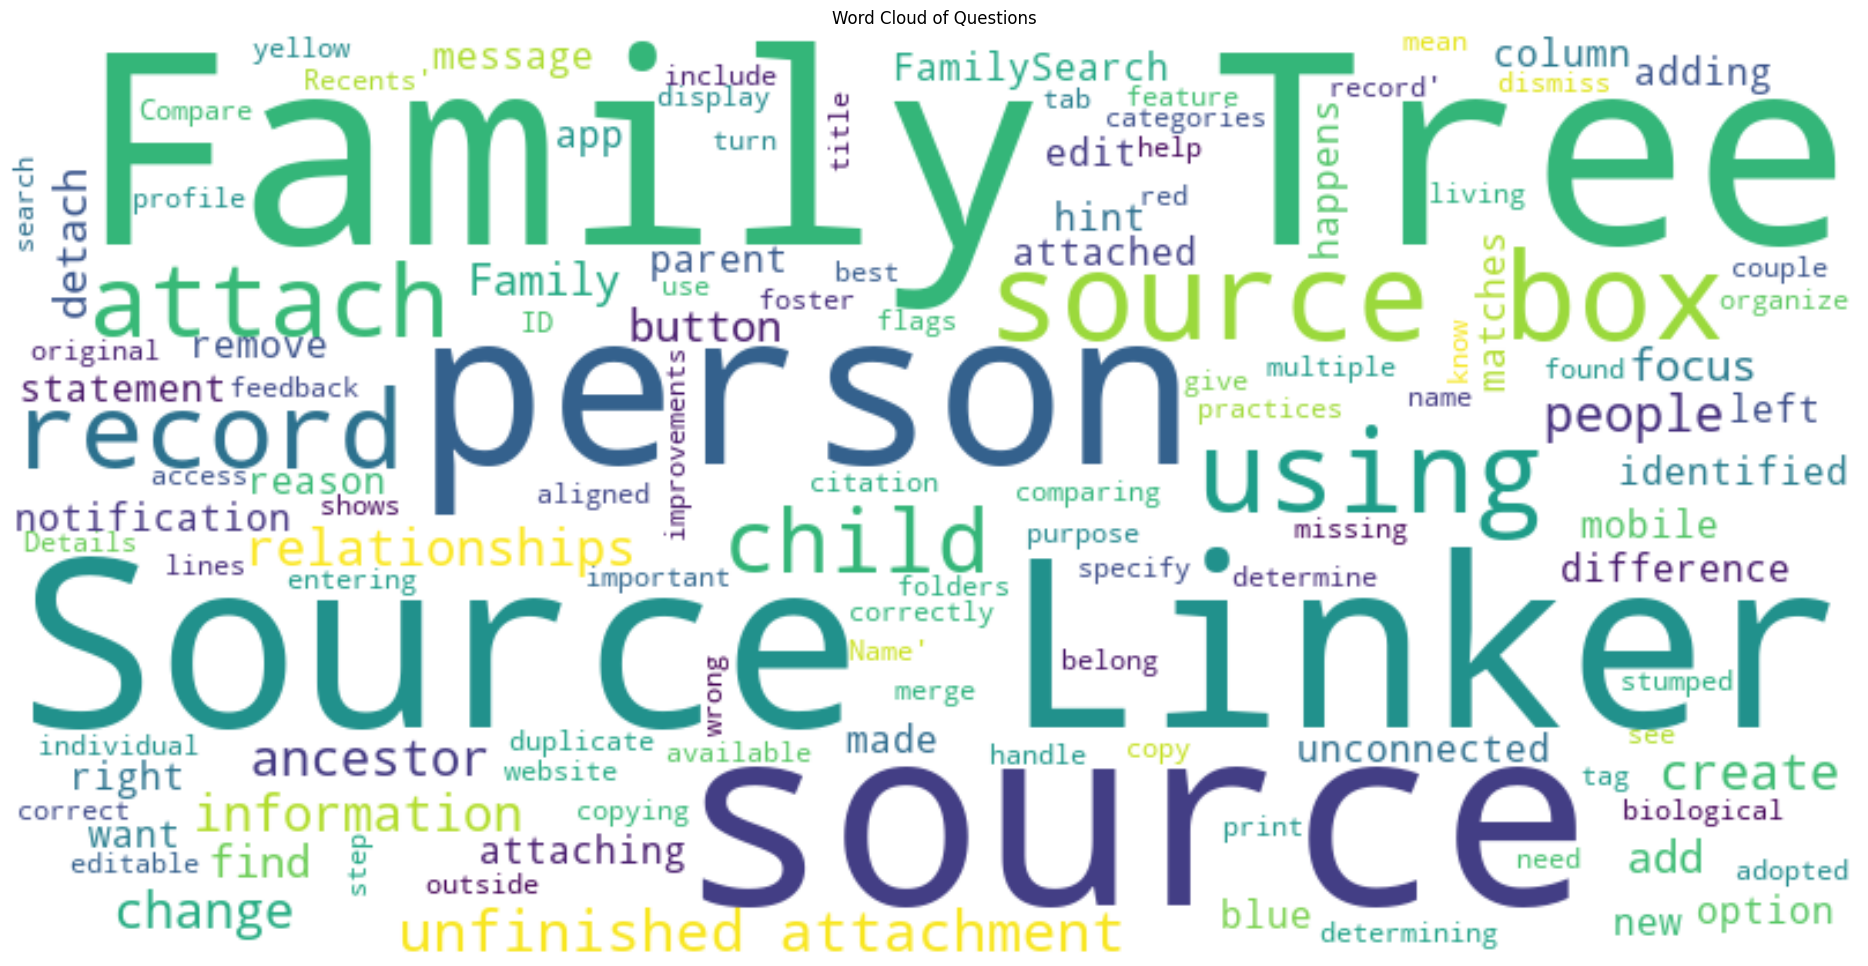

In [7]:
question_counts = df['Question'].value_counts()

# Create a word cloud from the questions
text = ' '.join(df['Question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plotting the word cloud
plt.figure(figsize=(24,12))  # Adjust the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Questions')
plt.show()

Sentiment Polarity: Ranges from -1 (negative) to 1 (positive). This will help you see how positive or negative the responses are.
Sentiment Subjectivity: Ranges from 0 (objective) to 1 (subjective). This shows how subjective or opinion-based the responses are.
Scatter Plots: Both polarity and subjectivity are plotted as scatter plots for better visualization of how these values change across the responses.
Visualization:
The horizontal line in the polarity plot indicates neutrality (0). Points above the line represent positive sentiment, while those below represent negative sentiment.
Both plots give you a sense of the overall sentiment of the responses, allowing you to see trends or anomalies in your data.

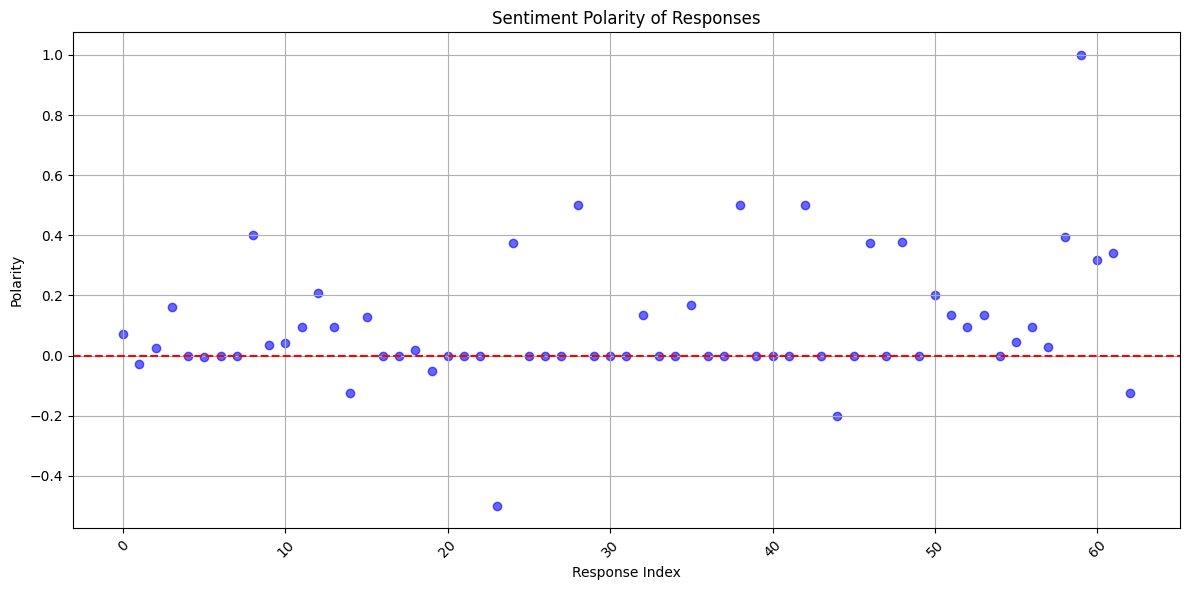

In [9]:
# Calculate sentiment polarity and subjectivity
df['polarity'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Plotting the sentiment polarity
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['polarity'], color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a line at y=0
plt.title('Sentiment Polarity of Responses')
plt.xlabel('Response Index')
plt.ylabel('Polarity')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

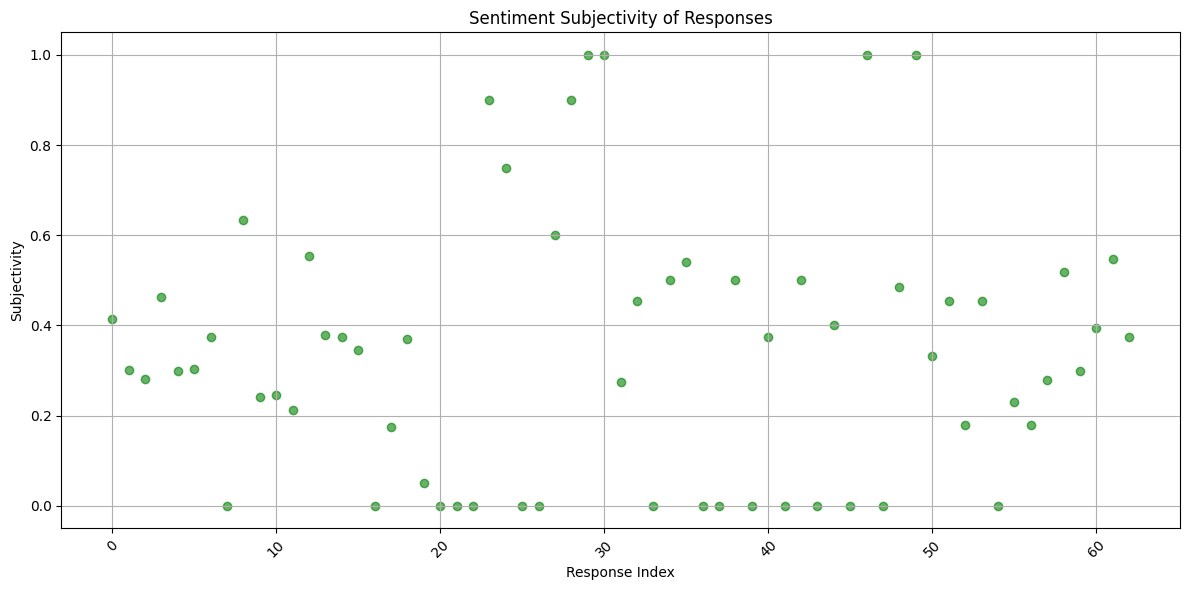

In [10]:
# Plotting the sentiment subjectivity
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['subjectivity'], color='green', alpha=0.6)
plt.title('Sentiment Subjectivity of Responses')
plt.xlabel('Response Index')
plt.ylabel('Subjectivity')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Question Complexity Analysis

### Overview
This analysis aims to assess the complexity of questions based on their length and evaluate how it relates to the success of responses. We defined complexity as the number of words in each question and analyzed the response success using a dummy resolution rate based on the sentiment of the responses.

### Methodology
1. **Question Length Calculation**: Each question's length was calculated by counting the number of words it contains. This serves as a measure of the question's complexity.
   
2. **Resolution Rate**: A dummy resolution rate was created by evaluating the sentiment polarity of each response. If the sentiment was positive (greater than 0), it was considered a successful response. This metric was used to analyze how the complexity of the question might correlate with the effectiveness of the response.

3. **Visualization**: A scatter plot was generated to illustrate the relationship between question length (complexity) and response success. Each point in the scatter plot represents a question's length and its corresponding success rate.

### Results
Below are the summary statistics for the question lengths:

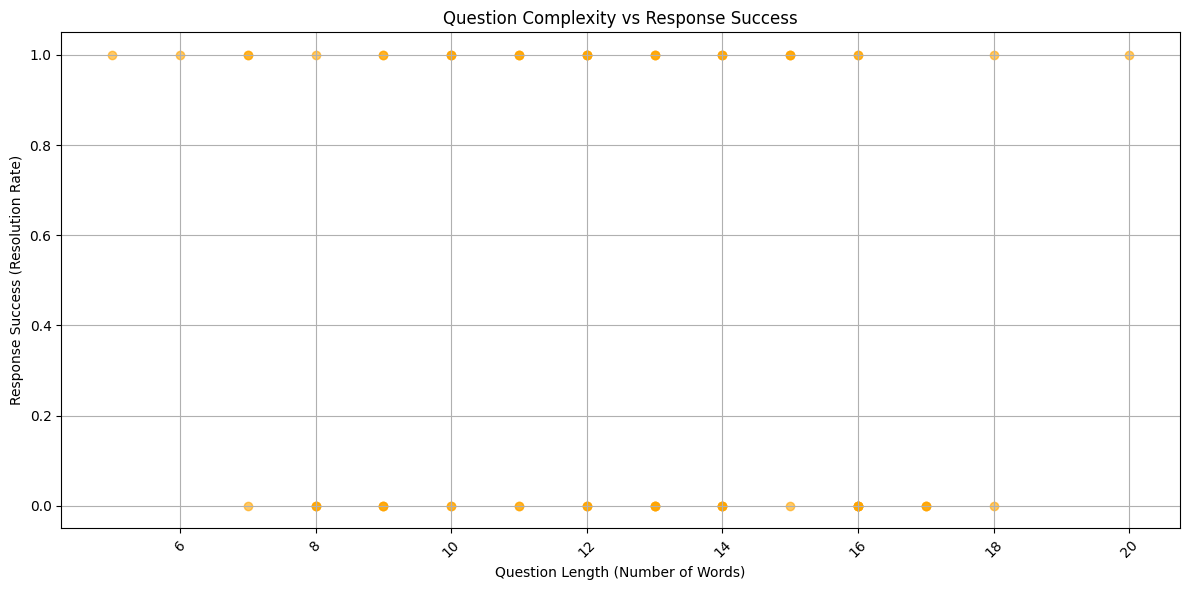

In [15]:
# Calculate question length (in terms of number of words)
df['question_length'] = df['Question'].apply(lambda x: len(x.split()))

# If you have a success metric (like resolution rate), you can add it here.
# For this example, we'll use a dummy resolution rate based on the polarity of responses
# You can replace this with your actual success metric if available.
df['resolution_rate'] = df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity > 0)

# Create a scatter plot to visualize question complexity vs resolution rate
plt.figure(figsize=(12, 6))
plt.scatter(df['question_length'], df['resolution_rate'], alpha=0.6, color='orange')
plt.title('Question Complexity vs Response Success')
plt.xlabel('Question Length (Number of Words)')
plt.ylabel('Response Success (Resolution Rate)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


### Interpretation of Results
- The summary statistics provide insight into the distribution of question lengths in our dataset, including measures such as mean, median, and standard deviation.
- The scatter plot visualizes the relationship between question length and response success. It allows us to identify any trends, such as whether longer questions tend to correlate with lower success rates or if there's no significant relationship between the two.

### Conclusion
This analysis helps in understanding how the complexity of questions might impact the effectiveness of responses. Further exploration could involve analyzing other factors or metrics related to response success.


In [14]:
# Show basic statistics of question lengths
print(df[['Question', 'question_length']].describe())

       question_length
count        63.000000
mean         12.412698
std           3.343916
min           5.000000
25%          10.000000
50%          13.000000
75%          15.000000
max          20.000000


## N-gram Analysis

### Overview
The N-gram analysis is designed to identify common phrases or patterns in user questions. By examining bigrams (two-word phrases), we can uncover frequently occurring word pairs that may indicate common topics or themes in user inquiries.

### Methodology
1. **N-gram Generation**: We generated bigrams from all user questions in our dataset, allowing us to analyze the frequency of two-word combinations.
  
2. **Graph Creation**: A network graph was constructed to visualize the relationships between the most common bigrams. The edges in the graph represent the frequency of co-occurrence of terms.

3. **Visualization**: The resulting network graph illustrates the connections between frequently occurring terms, providing insight into common user questions.

### Results
The network graph visualizes the relationships between bigrams, highlighting the most common two-word phrases in user questions.

### Interpretation of Results
- The graph reveals connections between terms, helping to identify popular topics and areas where users commonly seek information.
- By analyzing these bigrams, we can better understand user intent and refine the chatbot's responses.

### Conclusion
This N-gram analysis provides valuable insights into user behavior and question patterns, which can be used to enhance the chatbot's training and improve its overall performance.


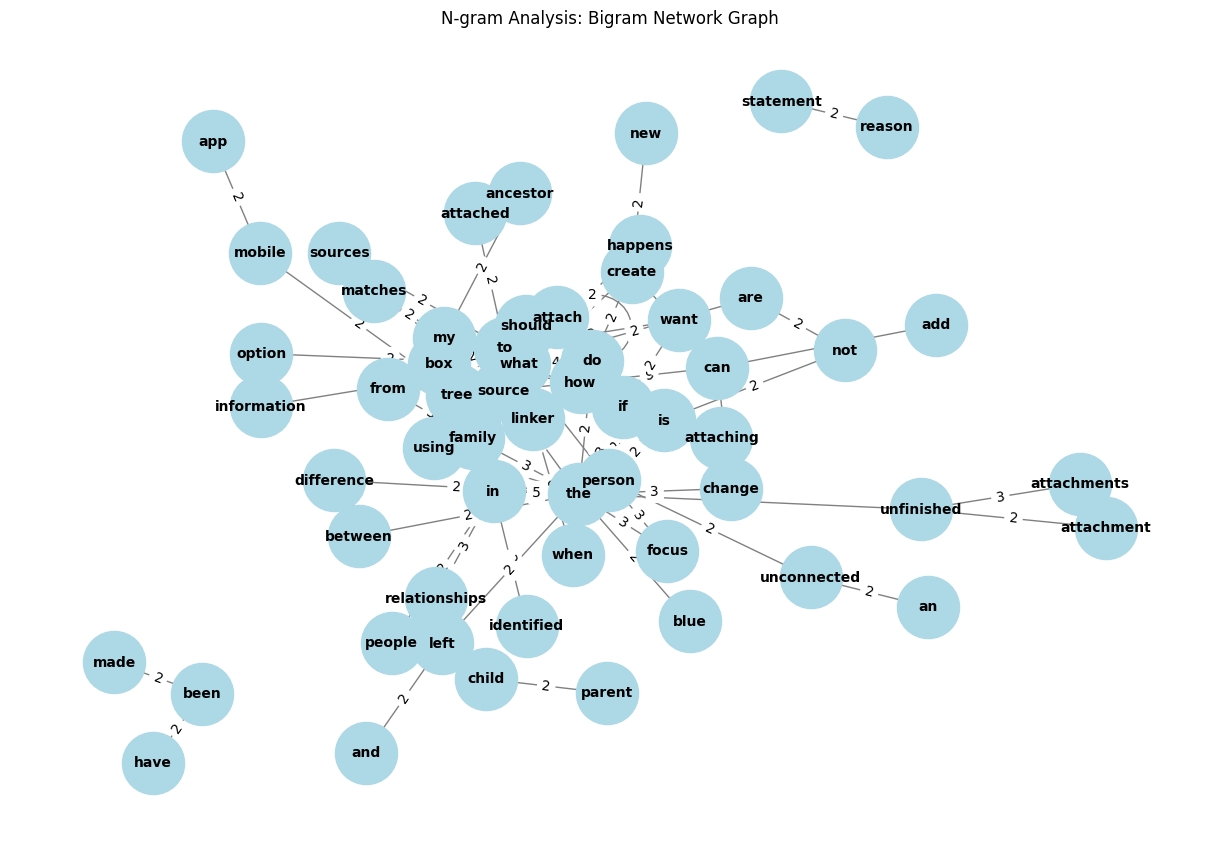

In [22]:
# Function to generate N-grams
def generate_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform([text])
    ngrams_sum = ngrams.sum(axis=0)
    return [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Generate bigrams for all questions
all_questions = ' '.join(df['Question'])
bigrams = generate_ngrams(all_questions, 2)

# Convert to DataFrame for easier manipulation
bigrams_df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])
bigrams_df = bigrams_df[bigrams_df['Count'] > 1]  # Filter for bigrams that occur more than once

# Create a graph for the bigrams
G = nx.Graph()

# Add edges to the graph based on bigram counts
for index, row in bigrams_df.iterrows():
    words = row['Bigram'].split()
    G.add_edge(words[0], words[1], weight=row['Count'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("N-gram Analysis: Bigram Network Graph")
plt.show()